In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.signal
from scipy.fftpack.realtransforms import dct,idct
from scipy import sparse
from siac.utils import diffFilter,filt,dctND,compose_dtd

Feng's DTD matrices, which look sensible:

In [4]:
nr,nc = 4,3

dtd, dtdx, dtdy = compose_dtd(nr, nc)
print('DTDx')
print(dtdx.todense())
print('DTDy')
print(dtdy.todense())
print('DTD')
print(dtd.todense())

DTDx
[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]
DTDy
[[ 1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  2.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  2.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  2.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  2.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1

In [100]:
def dctND(data,f=dct,axis=(0,1)):
    return f(f(data,norm='ortho',type=2,axis=axis[0])\
                  ,norm='ortho',type=2,axis=axis[1])

def dct1D(data,f=dct,axis=0):
    return f(data,norm='ortho',type=2,axis=axis)

Examine dtdx (dx being column direction).

2.0000000000000013


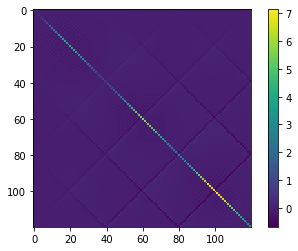

In [165]:


nr,nc = 20,6

# column-wise
dtd,dtdx,dtdy = compose_dtd(nr, nc)
M = dtd.todense()
I = np.eye(nr*nc)

Lf = dctND(M * np.matrix(dctND(I,axis=(0,1))),f=idct,axis=(0,1))

print(Lf.sum()/(nr*nc))
plt.imshow(Lf,interpolation='none')
plt.colorbar()

nr,nc 20 6
3.5666666666666678
7.13421730575239 0.008776058714630424


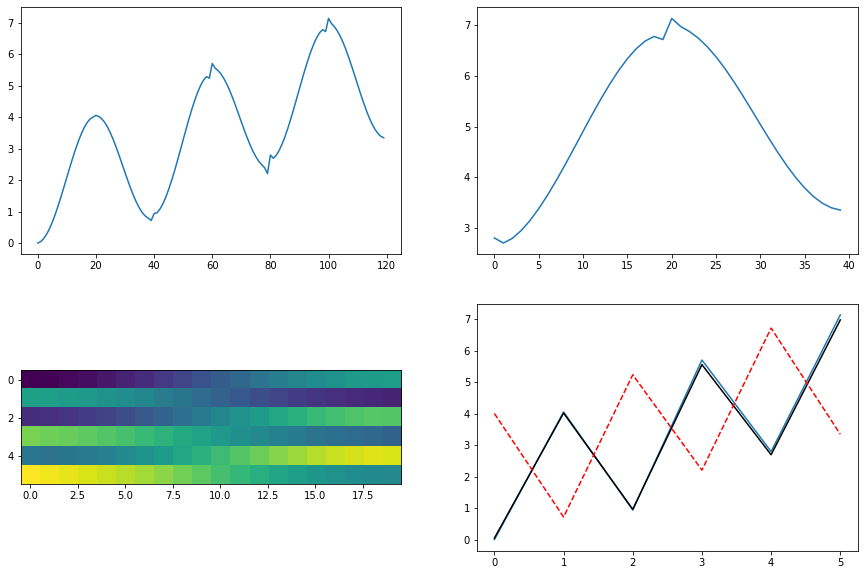

In [213]:
print('nr,nc',nr,nc)

L = np.diag(Lf)
print((L.sum()/(nr*nc)))

# notice that L is packed as nc,nr
# not nr,nc
L_ = np.array(L.reshape(nc,nr))

print(L.max(),L.min())
fig,((ax0,ax1),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))
ax0.plot(L)
ax1.plot((L)[-nr*2:])
im1=ax3.imshow(L_)
ax4.plot(L_[:,0])
ax4.plot(L_[:,1],'k')
ax4.plot(L_[:,-1],'r--')

The DCT (type-II) of this is diagonal, with some small numerical issues. 

Lets explore from the other point of view:

20 6
3.566666666666667
7.707427488759153 0.0


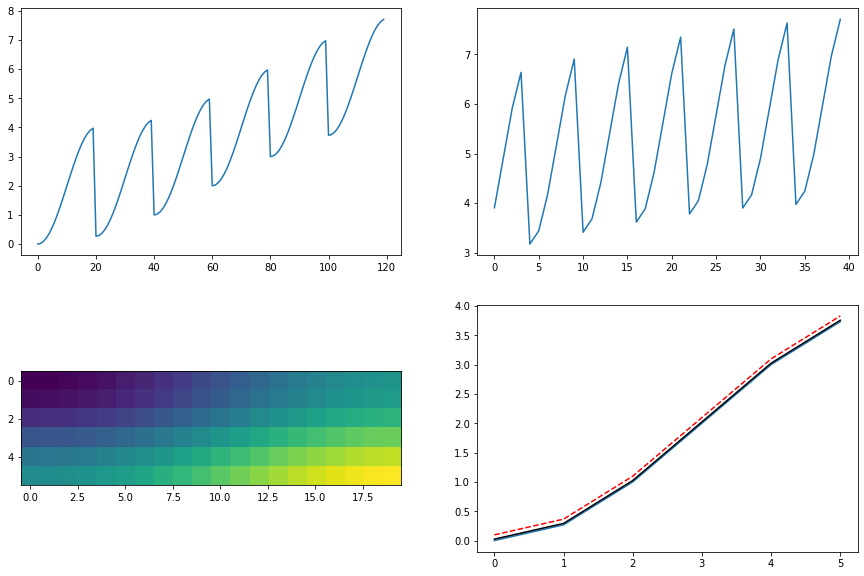

In [152]:
print(nr,nc)
# 
c,r = np.mgrid[:nc,:nr]

# dx is column-wise
omega = np.pi*c/nc
Lambda = (2 - 2 * np.cos(omega))
omega = np.pi*(r/nr)
Lambda += (2 - 2 * np.cos(omega))
print(Lambda.sum()/(nr*nc))
print(Lambda.max(),Lambda.min())
fig,((ax0,ax1),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))
ax0.plot(Lambda.ravel())
ax1.plot((Lambda.T.ravel())[-nr*2:])
_=ax3.imshow(Lambda)
ax4.plot(Lambda[:,0])
ax4.plot(Lambda[:,1],'k')
ax4.plot(Lambda[:,2],'r--')

for large $nx,ny$ then, we have shown the equivalence between the two definitions. The only difference is the ordering of the eigenvalues, which is to do with how the operations are calculated.

## Impact

(1800,)

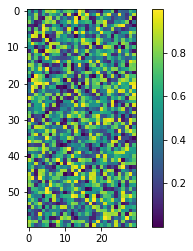

In [257]:
nr,nc = 60,30

# dataset 
image = np.random.rand(nr,nc)
plt.imshow(image)
plt.colorbar()

fimage = image.flatten()
fimage.shape

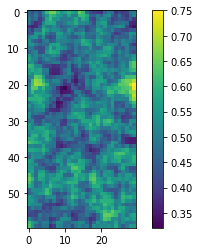

In [258]:
gamma = 2.0

dtd,dtdx,dtdy = compose_dtd(nr, nc)
I = np.eye(nr*nc)
F1 = (I + gamma * dtd).I

r1 = np.array(np.dot(F1,fimage).reshape(nr, nc))
plt.imshow(r1)
plt.colorbar()

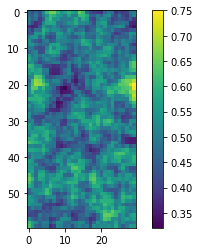

In [259]:
c,r = np.mgrid[:nc,:nr]

# dx is column-wise
omega = np.pi*c/nc
Lambda = (2 - 2 * np.cos(omega))
omega = np.pi*(r/nr)
Lambda += (2 - 2 * np.cos(omega))
Lambda = Lambda.T
Gamma = 1/(1+ gamma * Lambda)
r2 = dctND(Gamma * dctND(image),f=idct)
plt.imshow(r2)
plt.colorbar()

they are the same


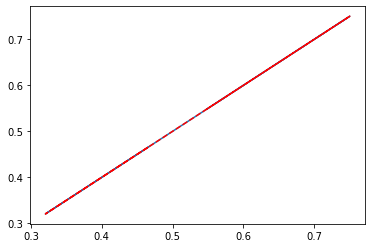

In [260]:
plt.plot(r1.ravel(),r2.ravel())
plt.plot(r1.ravel(),r1.ravel(),'r--')
print('they are the same')

## Correlation function

We want to show the equivalence between the following, in the spatial and F-domain:

$$
C = \sigma_s^2 \sigma_x^2 U^T  \Gamma^2 U
$$

So, if e.g. we design a prior covariance constraint for DA, we can phrase it as:
$$
C^{-1} =  \frac{1}{\sigma_s^2 \sigma_x^2} \left( I + s D^TD \right) 
$$

or, in the form of Lewis et al. (2012):

$$
C^{-1} =  \frac{1}{\sigma_p^2}  I + \gamma^2 D^TD 
$$

To use this form, we need to set:

$$
\sigma_p^2 = \sigma_s^2 \sigma_x^2
$$

and 

$$
\gamma^2 = \frac{s}{\sigma_s^2 \sigma_x^2}
$$

In [425]:
a = np.sqrt(1 + 16*s)
1./sigma_s,1/(1+np.sqrt(s)),np.sqrt(np.sqrt((1+a)/(2*a*a)))

(0.4105164800794368, 0.3090169943749474, 0.4984495937404068)

0.5049694032676887 0.015634098499551562
0.9174159690542294 0.08004587493088566


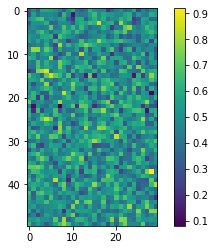

In [447]:
nr,nc = 50,30

# dataset 
image = np.random.normal(loc=0.5,scale=1./8,size=(nr,nc))
print(np.mean(image),np.var(image))
print(np.max(image),np.min(image))


var_image = np.var(image)

plt.imshow(image,interpolation='none')
plt.colorbar()

fimage = image.flatten()
fimage.shape

impulse = np.zeros_like(image)
impulse[int(nr/2),int(nc/2)] = 1
fimpulse = impulse.flatten()

In [489]:
# spatial domain
s = 3
sigma_x = 0.5

# DCT
c,r = np.mgrid[:nc,:nr]
# dx is column-wise
omega = np.pi*(c/nc)
Lambda = (2 - 2 * np.cos(omega))
omega = np.pi*(r/nr)
Lambda += (2 - 2 * np.cos(omega))
Lambda = Lambda.T
Gamma = 1/(1+ s * Lambda)
sigma_s = (1./np.sqrt(np.mean(Gamma)))

print(np.sqrt(s),sigma_s)

1.7320508075688772 2.8470399190161744


orig 0.9174159690542294 0.08004587493088566
full 0.5946842077134381 0.43290630269703445
lewis 0.5946842077134369 0.43290630269703384

max of correlation (should around 1)
0.6895083122428921 0.6895083122428921


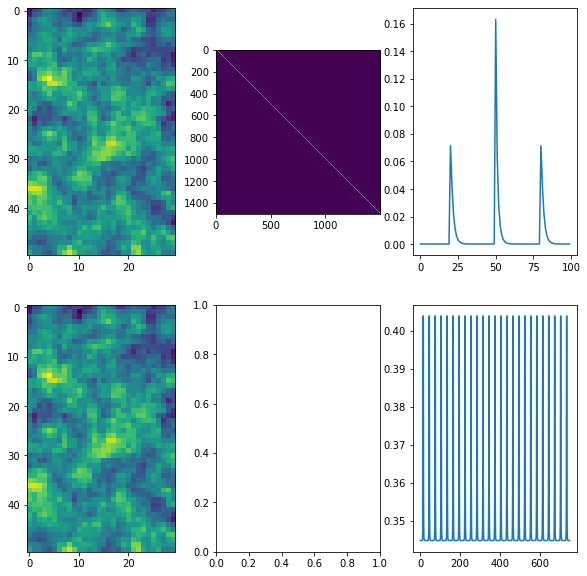

In [488]:
dtd,dtdx,dtdy = compose_dtd(nr, nc)
I = np.eye(nr*nc)

sigma_p = sigma_x * sigma_s
sigma_p2 = sigma_p**2
# full def
C1_spatial = (1/(sigma_p2)) * ( I + s * dtd)

# lewis def ... just the same, expanded
C1_lewis = (1/(sigma_p2)) * I + (1/(sigma_p2)) * s * dtd

C_spatial = C1_spatial.I
C_lewis = C1_lewis.I

r_spatial = np.array(np.dot(C_spatial,fimage).reshape(nr, nc))
r_lewis = np.array(np.dot(C_lewis,fimage).reshape(nr, nc))

fig,((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(10,10))
ax1.imshow(C_spatial,interpolation='none')
mid = int(nr*nc/2)
ax2.plot(C_lewis[mid,mid-nr:mid+nr].T)
_=ax0.imshow(r_spatial)
_=ax3.imshow(r_lewis)
diag = np.sqrt(np.diag(C_spatial))[int((nr*nc)*0.25):int((nr*nc)*0.75)]
ax5.plot(diag)
print('orig',image.max(),image.min())
print('full',r_spatial.max(),r_spatial.min())
print('lewis',r_lewis.max(),r_lewis.min())
print()
# check the correlation term ...
print('max of correlation (should around 1)')

print(diag.min()/(sigma_x),diag.min()/(sigma_x))

orig 0.9174159690542294 0.08004587493088566
full 0.1656044987377993 0.11156228450271216
lewis 0.1656044987377993 0.11156228450271216


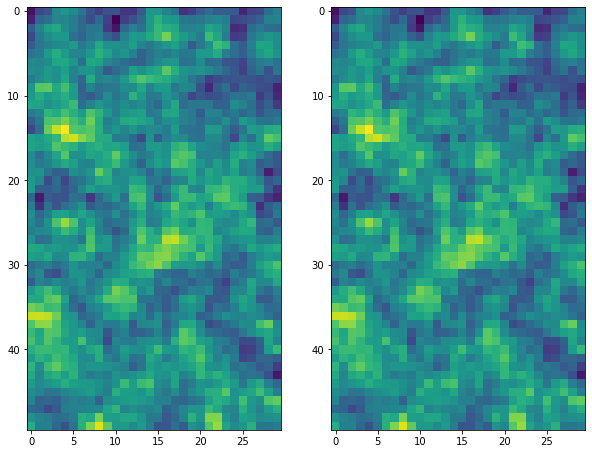

In [450]:
sigma_p = sigma_x * sigma_s

Gamma_freq = sigma_p2/( 1 + s * Lambda)
# the same ...
Gamma_freq_lewis = 1/(1/sigma_p2 + (s/sigma_p2) * Lambda)

r_freq = dctND(Gamma_freq * dctND(image),f=idct)
r_freq_lewis = dctND(Gamma_freq_lewis * dctND(image),f=idct)

# these are the std terms (from the spatial method)
# plotted as images
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(10,10))
_=ax0.imshow(r_freq)
_=ax1.imshow(r_freq_lewis)

print('orig',image.max(),image.min())
print('full',r_freq.max(),r_freq.min())
print('lewis',r_freq_lewis.max(),r_freq_lewis.min())